In [50]:
!pip install plotly

In [51]:
!pip install notebook

In [52]:
!pip install ipywidgets

In [53]:
!pip install widgetsnbextension

In [54]:
!pip install matplotlib

In [55]:
!pip install folium

In [56]:
!pip install scikit-learn

In [57]:
!pip install torch

In [58]:
!pip install seaborn

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import folium
from IPython.display import display
import torch
import torch.optim as optim

In [21]:
pio.renderers.default='notebook_connected'
plt.style.use

<function matplotlib.style.core.use(style)>

In [22]:
df=pd.read_csv('jeju_bus.csv')
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [23]:
df['hour'] = df['now_arrive_time'].str.replace('시','').astype(int)
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21


In [24]:
df['speed']=df['distance']/ df['next_arrive_time']
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421


In [25]:
df.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824,13.785990,6.887892
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170,4.682768,3.529959
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000,0.000000,0.064694
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000,10.000000,4.127273
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000,14.000000,6.330000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000,18.000000,9.085938
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000,23.000000,27.978261


In [26]:
print(df.head())

   id        date   route_id    vh_id route_nm  now_latitude  now_longitude  \
0   0  2019-10-15  405136001  7997025    360-1     33.456267     126.551750   
1   1  2019-10-15  405136001  7997025    360-1     33.457724     126.554014   
2   2  2019-10-15  405136001  7997025    360-1     33.458783     126.557353   
3   3  2019-10-15  405136001  7997025    360-1     33.479705     126.543811   
4   4  2019-10-15  405136001  7997025    360-1     33.485662     126.494923   

  now_station now_arrive_time  distance     next_station  next_latitude  \
0     제주대학교입구             06시     266.0             제대마을      33.457724   
1        제대마을             06시     333.0            제대아파트      33.458783   
2       제대아파트             06시     415.0            제주대학교      33.459893   
3   남국원(아라방면)             06시     578.0  제주여자중고등학교(아라방면)      33.484860   
4         도호동             07시     374.0              은남동      33.485822   

   next_longitude  next_arrive_time  hour      speed  
0      126.554014  

In [27]:
print(df.isnull().sum())#결측치 확인


id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
hour                0
speed               0
dtype: int64


In [28]:
df['route_nm'].fillna(df['route_nm'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21444\3953208331.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Text(0, 0.5, 'distance')

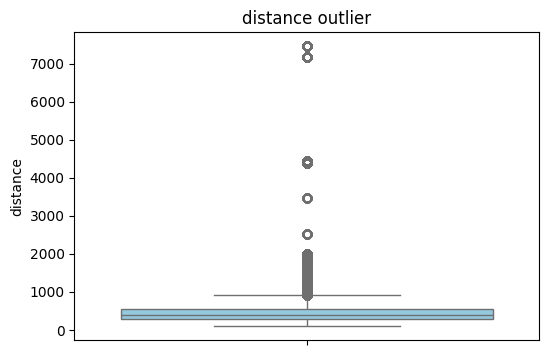

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["distance"],color='skyblue')
plt.title('distance outlier', fontsize=12)
plt.ylabel("distance")

Text(0, 0.5, 'next_arrive_time')

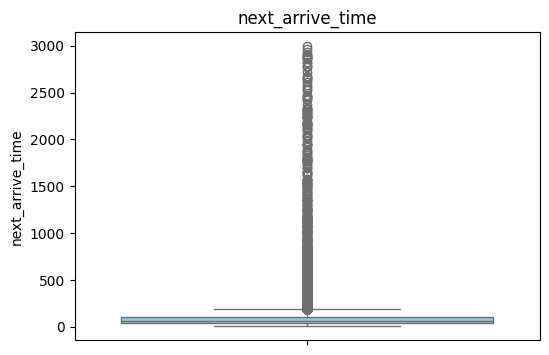

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["next_arrive_time"],color='skyblue')
plt.title('next_arrive_time', fontsize=12)
plt.ylabel("next_arrive_time")

In [29]:
cols = ['distance','next_arrive_time','hour','speed']
for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)

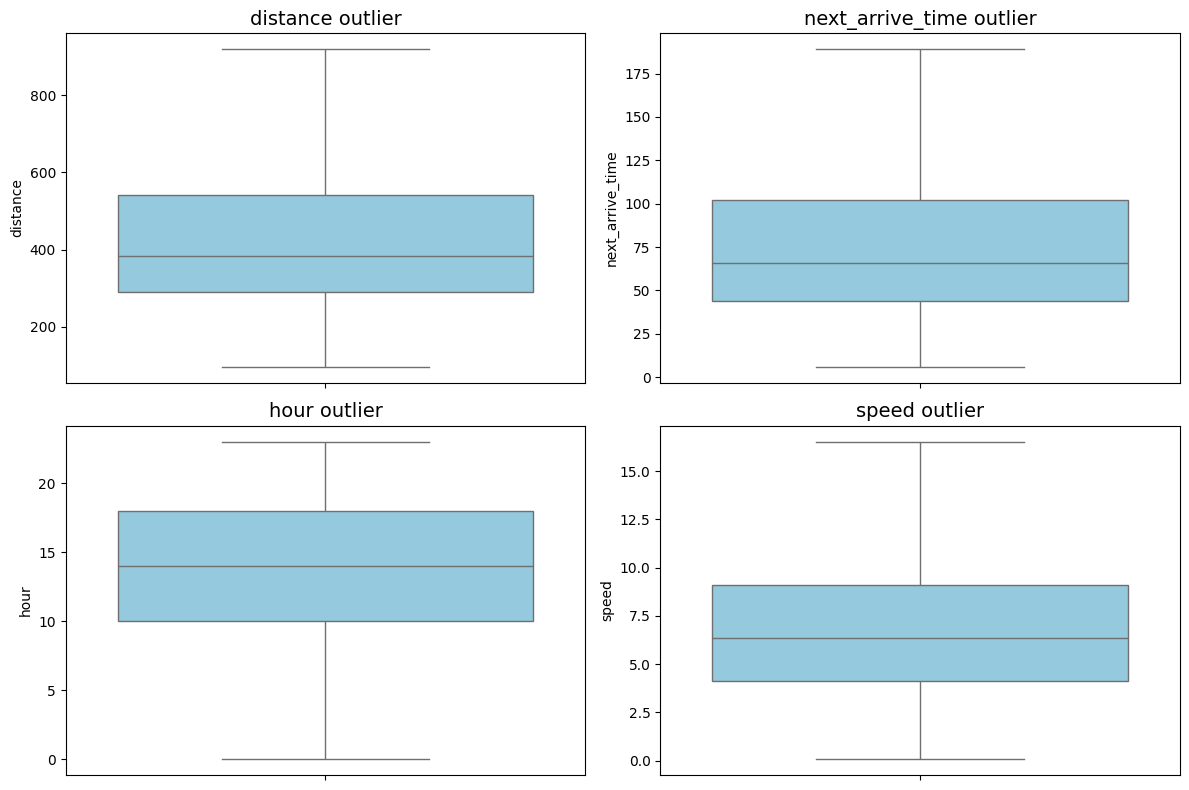

In [30]:
cols_to_plot= ['distance','next_arrive_time','hour','speed']
plt.figure(figsize=(12,8))
for idx, col in enumerate(cols_to_plot,1):
    plt.subplot(2,2,idx)
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(f'{col} outlier',fontsize=14)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [31]:
numeric_df= df.select_dtypes(include=['number'])
numeric_df

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,405136001,7997025,33.456267,126.551750,266.0,33.457724,126.554014,24,6,11.083333
1,1,405136001,7997025,33.457724,126.554014,333.0,33.458783,126.557353,36,6,9.250000
2,2,405136001,7997025,33.458783,126.557353,415.0,33.459893,126.561624,40,6,10.375000
3,3,405136001,7997025,33.479705,126.543811,578.0,33.484860,126.542928,42,6,13.761905
4,4,405136001,7997025,33.485662,126.494923,374.0,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,405328102,7983486,33.255783,126.577450,528.0,33.251896,126.574417,96,21,5.500000
210453,210453,405328102,7983486,33.248595,126.568527,280.0,33.249753,126.565959,50,21,5.600000
210454,210454,405328102,7983486,33.251891,126.560303,114.0,33.251084,126.559551,16,21,7.125000
210455,210455,405328102,7983486,33.251084,126.559551,223.0,33.249504,126.558068,38,21,5.868421


In [32]:
corr_matrix = numeric_df.corr()
corr_matrix

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
id,1.000000,0.070271,-0.069053,-0.033693,0.028164,0.005924,-0.033395,0.027867,-0.017654,0.025857,0.024088
route_id,0.070271,1.000000,-0.998641,-0.432923,0.555106,0.121910,-0.431895,0.552970,-0.238076,0.007603,0.338925
vh_id,-0.069053,-0.998641,1.000000,0.421832,-0.579469,-0.120384,0.420799,-0.577379,0.243466,-0.006668,-0.342974
now_latitude,-0.033693,-0.432923,0.421832,1.000000,-0.083973,-0.018942,0.998971,-0.085858,0.167976,-0.010887,-0.188539
now_longitude,0.028164,0.555106,-0.579469,-0.083973,1.000000,0.153731,-0.082066,0.999531,-0.177942,-0.012707,0.338618
distance,0.005924,0.121910,-0.120384,-0.018942,0.153731,1.000000,-0.015667,0.153128,0.420708,-0.001808,0.408078
next_latitude,-0.033395,-0.431895,0.420799,0.998971,-0.082066,-0.015667,1.000000,-0.083894,0.169284,-0.010949,-0.186734
next_longitude,0.027867,0.552970,-0.577379,-0.085858,0.999531,0.153128,-0.083894,1.000000,-0.178025,-0.013694,0.338278
next_arrive_time,-0.017654,-0.238076,0.243466,0.167976,-0.177942,0.420708,0.169284,-0.178025,1.000000,-0.003822,-0.520625
hour,0.025857,0.007603,-0.006668,-0.010887,-0.012707,-0.001808,-0.010949,-0.013694,-0.003822,1.000000,0.010747


In [33]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421


C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\57313237.py:26: UserWarning:

Glyph 54

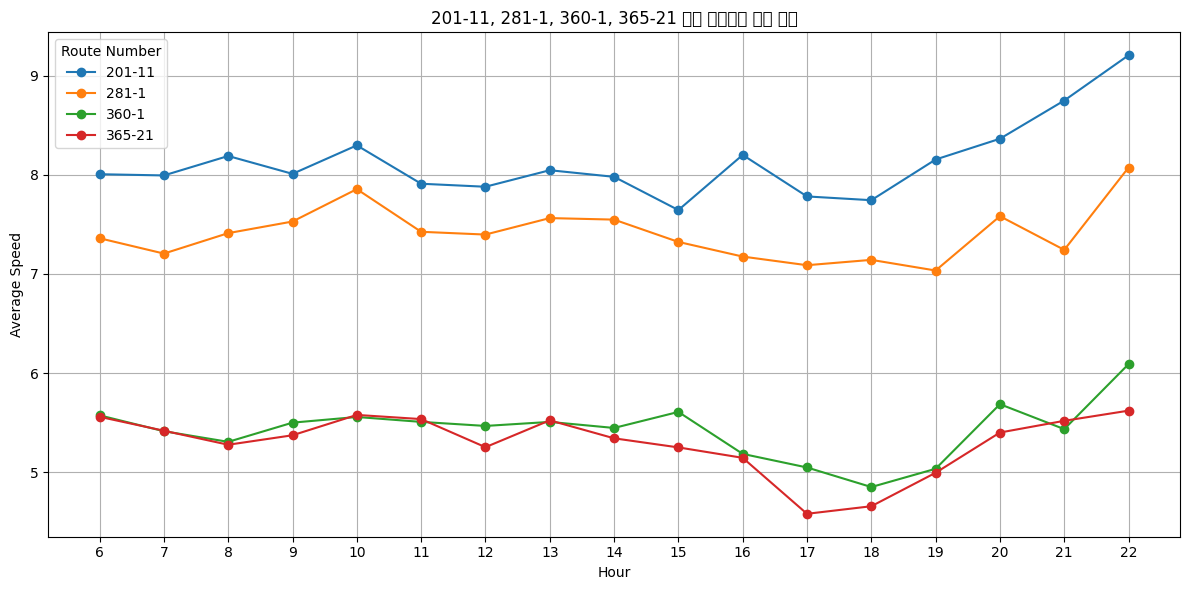

In [34]:

# 1. 원하는 노선만 필터링
target_routes = ['201-11', '281-1', '360-1', '365-21']
df_filtered = df[df['route_nm'].isin(target_routes)].copy()

# 2. hour 컬럼에서 숫자만 추출 (예: "06시" → 6)
df_filtered['hour_num'] = df_filtered['hour'].astype(str).str.extract('(\d+)').astype(int)

# 3. 06시~22시만 필터링
df_filtered = df_filtered[(df_filtered['hour_num'] >= 6) & (df_filtered['hour_num'] <= 22)]

# 4. route_nm, hour_num별 평균 속도 계산
avg_speed = df_filtered.groupby(['route_nm', 'hour_num'])['speed'].mean().reset_index()

# 5. 그래프 그리기
plt.figure(figsize=(12, 6))
for route in target_routes:
    temp = avg_speed[avg_speed['route_nm'] == route]
    plt.plot(temp['hour_num'], temp['speed'], marker='o', label=route)

plt.xlabel('Hour')
plt.ylabel('Average Speed')
plt.title('201-11, 281-1, 360-1, 365-21 노선 시간대별 평균 속도')
plt.xticks(range(6, 23))
plt.legend(title='Route Number')
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
df['r_nm'] = df['route_nm'].str.replace(r'-\d+$', '', regex=True)

In [36]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333,360
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000,360
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000,281
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000,281
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000,281
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421,281


C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: UserWarning:

Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.

C:\Users\User\AppData\Local\Temp\ipykernel_21444\1304730379.py:14: User

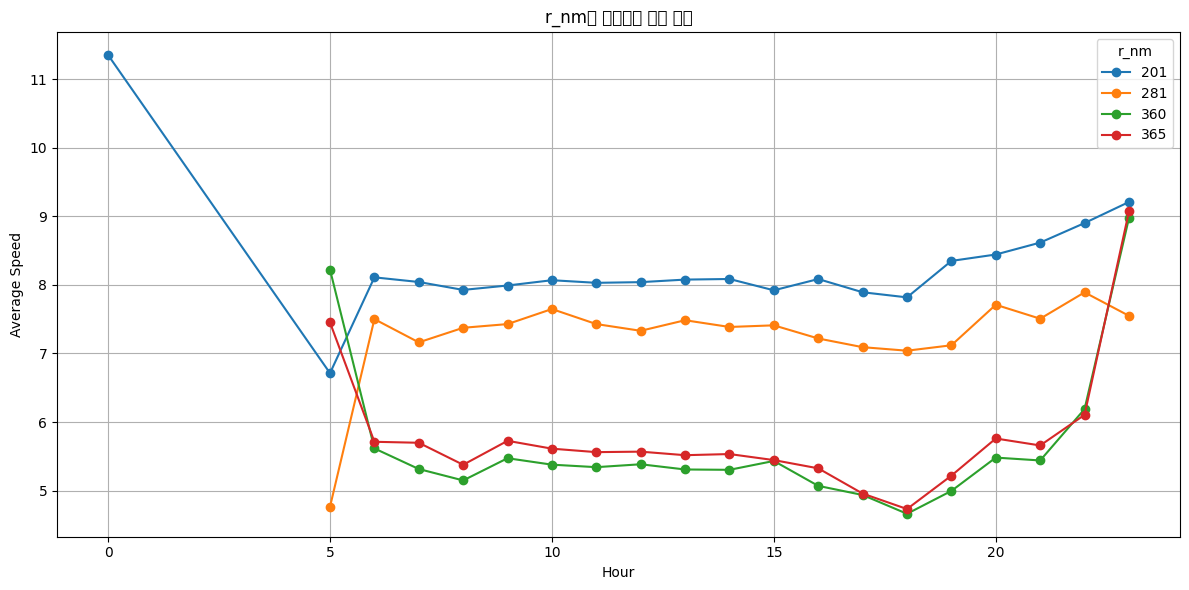

In [37]:
avg_speed_rnm_hour = df.groupby(['r_nm', 'hour'])['speed'].mean().reset_index()

# 실선 그래프 그리기
plt.figure(figsize=(12, 6))
for r_nm in avg_speed_rnm_hour['r_nm'].unique():
    temp = avg_speed_rnm_hour[avg_speed_rnm_hour['r_nm'] == r_nm]
    plt.plot(temp['hour'], temp['speed'], marker='o', label=str(r_nm))

plt.xlabel('Hour')
plt.ylabel('Average Speed')
plt.title('r_nm별 시간대별 평균 속도')
plt.legend(title='r_nm')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
from branca.colormap import linear
from IPython.display import IFrame
from folium import Map, CircleMarker
from IPython.display import display
from ipywidgets import interact

In [39]:
df[['now_latitude','now_longitude']]

,now_latitude,now_longitude
0,33.456267,126.551750
1,33.457724,126.554014
2,33.458783,126.557353
3,33.479705,126.543811
4,33.485662,126.494923
...,...,...
210452,33.255783,126.577450
210453,33.248595,126.568527
210454,33.251891,126.560303
210455,33.251084,126.559551


In [40]:
df_unique=df.drop_duplicates(subset=['now_latitude','now_longitude'])
df_unique

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333,360
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000,360
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42273,42273,2019-10-17,405320121,7983092,201-21,33.462001,126.910329,오조리상동입구,07시,424.0,오조리하동,33.458533,126.912250,68,7,6.235294,201
70487,70487,2019-10-19,405320115,7983096,201-15,33.260674,126.607735,서귀포동부도서관,18시,918.5,상효입구,33.259648,126.595047,130,18,9.246154,201
71394,71394,2019-10-19,405320116,7983093,201-16,33.506815,126.877643,전경대 입구,08시,918.5,상도마을회관,33.514450,126.866133,118,8,11.584746,201
72459,72459,2019-10-19,405320121,7983092,201-21,33.402263,126.895551,온평리,12시,918.5,화성농장,33.391967,126.889533,46,12,16.523935,201


In [41]:
df_unique=df_unique.reset_index()


In [42]:
map_jeju=folium.Map(
    location=[df_unique['now_latitude'].mean(),df_unique['now_longitude'].mean()],zoom_start=11)


In [43]:
for idx in range(len(df_unique)):
    row=df_unique.loc[idx]
    folium.Marker(
        location=[row['now_latitude'],row['now_longitude']],
        popup=f"{row['now_station']}",
        icon=folium.Icon(icon='bus',color='blue')
    ).add_to(map_jeju)
    folium.PolyLine(
        locations=[
            [row['now_latitude'], row['now_longitude']],
            [row['next_latitude'], row['next_longitude']]
        ],
        color='green',weight=2).add_to(map_jeju)
map_jeju.save("jeju_map.html")

In [44]:
from IPython.display import IFrame
IFrame("jeju_map.html",width='100%', height=800)

In [45]:
t20=df['now_station'].value_counts().head(20)
t20.values

array([3361, 3098, 3093, 3056, 2789, 2728, 2606, 2474, 2363, 2290, 2281,
       2232, 2215, 2192, 2166, 2106, 2090, 2047, 2021, 1997], dtype=int64)

In [46]:
df_t20=df[df['now_station'].isin(t20.index)]
df_t20=df_t20.drop_duplicates(subset=['now_station','now_latitude','now_longitude'])
df_t20

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360
11,11,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917,62,8,4.693548,360
12,12,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,08시,381.0,제원아파트,33.487531,126.489892,88,8,4.329545,360
13,13,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,08시,267.0,은남동,33.485822,126.490897,66,8,4.045455,360
14,14,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,08시,374.0,도호동,33.485662,126.494923,158,8,2.367089,360
16,16,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,08시,455.0,제주도청 신제주로터리,33.491433,126.496783,86,8,5.290698,360
17,17,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,08시,528.0,연동입구,33.496203,126.496995,168,8,3.142857,360
24,24,2019-10-15,405136001,7997025,360-1,33.500017,126.525833,탐라장애인 종합복지관,08시,459.0,제주시청(아라방면),33.499560,126.529771,66,8,6.954545,360


In [47]:
df_t20=df_t20.merge(t20.rename('count'),left_on='now_station',right_index=True)
df_t20

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm,count
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360,2232
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360,3361
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360,3093
11,11,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917,62,8,4.693548,360,2192
12,12,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,08시,381.0,제원아파트,33.487531,126.489892,88,8,4.329545,360,2363
13,13,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,08시,267.0,은남동,33.485822,126.490897,66,8,4.045455,360,2728
14,14,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,08시,374.0,도호동,33.485662,126.494923,158,8,2.367089,360,2789
16,16,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,08시,455.0,제주도청 신제주로터리,33.491433,126.496783,86,8,5.290698,360,2106
17,17,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,08시,528.0,연동입구,33.496203,126.496995,168,8,3.142857,360,2090
24,24,2019-10-15,405136001,7997025,360-1,33.500017,126.525833,탐라장애인 종합복지관,08시,459.0,제주시청(아라방면),33.499560,126.529771,66,8,6.954545,360,2166


In [48]:
def normalize_size(x,min_size=8,max_size=20):
    return((x-t20.min())/(t20.max()-t20.min()))*(max_size-min_size)+min_size

In [49]:
colormap=linear.YlOrRd_09.scale(t20.min(), t20.max())
colormap.caption="정류장 정차 횟수 (top20)"
map_jeju=folium.Map(
    location=[df_t20['now_latitude'].mean(), df_t20['now_longitude'].mean()],
    zoom_start=11,width='100%',height='800px'
)
for _, row in df_t20.iterrows():
   folium.CircleMarker(
        location=[row['now_latitude'], row['now_longitude']],  # 마커의 위치(위도, 경도)
        radius=normalize_size(row['count']),                   # 정차 횟수에 따라 원의 반지름 설정
        popup=f"{row['now_station']}<br>정차 횟수: {row['count']}",  # 클릭 시 나타나는 팝업 정보
        tooltip=row['now_station'],                            # 마우스 오버 시 나타나는 툴팁
        color=colormap(row['count']),                          # 원의 테두리 색상
        fill=True,                                             # 원 내부 채우기 여부
        fill_color=colormap(row['count']),                     # 원 내부 색상
        fill_opacity=0.7                                       # 원 내부 투명도
    ).add_to(map_jeju)       
colormap.add_to(map_jeju)
map_jeju.save("bus_stop_count.html")

In [50]:
df_unique = df.drop_duplicates(subset=['now_station','now_latitude','now_longitude','hour'])
pd.pivot_table(df_unique,
               index=['hour','now_station'],
               values='now_latitude',
               aggfunc='count')

now_latitude
hour now_station              
0    고성리제주은행                 1
     성산리                     1
     성산일출봉입구                 1
     종달리                     1
     종달초등학교                  1
...                        ...
23   함덕리 3구                  1
     해양연구소                   1
     현대산부인과                  1
     홍랑로입구                   1
     흙통                      1

[5985 rows x 1 columns]

In [51]:
station_pivout = pd.pivot_table(df_unique,
              index=['hour','now_station'],
              values='now_latitude',
              aggfunc='count').reset_index().rename(columns={'now_latitude':'count'})
station_pivout

,hour,now_station,count
0,0,고성리제주은행,1
1,0,성산리,1
2,0,성산일출봉입구,1
3,0,종달리,1
4,0,종달초등학교,1
...,...,...,...
5980,23,함덕리 3구,1
5981,23,해양연구소,1
5982,23,현대산부인과,1
5983,23,홍랑로입구,1


In [52]:
def plot_hourly_map(selected_hour):
    hour_data = df_unique[df_unique['hour'] == selected_hour]

    m = folium.Map(
        location=[df['now_latitude'].mean(), df['now_longitude'].mean()],
        zoom_start=11,
        width='100%',
        height='800px'
    )

    for _, row in hour_data.iterrows():
        folium.Marker(
            location=[row['now_latitude'], row['now_longitude']],
            popup=row['now_station'],
            tooltip=row['now_station'],
            icon=folium.Icon(
                icon='bus',
                prefix='fa',
                color='blue'
            )
        ).add_to(m)

    map_file = f"hour_{selected_hour:02d}_stations.html"
    m.save(map_file)

    display(IFrame(map_file, width='100%', height='800px'))

interact(plot_hourly_map, selected_hour=(0, 23))

interactive(children=(IntSlider(value=11, description='selected_hour', max=23), Output()), _dom_classes=('widg…

<function __main__.plot_hourly_map(selected_hour)>

In [53]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333,360
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000,360
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000,281
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000,281
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000,281
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421,281


In [79]:
x=df[["now_latitude",'now_longitude','distance','next_latitude','next_longitude','hour','speed']]
x

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
0,33.456267,126.551750,266.0,33.457724,126.554014,6,11.083333
1,33.457724,126.554014,333.0,33.458783,126.557353,6,9.250000
2,33.458783,126.557353,415.0,33.459893,126.561624,6,10.375000
3,33.479705,126.543811,578.0,33.484860,126.542928,6,13.761905
4,33.485662,126.494923,374.0,33.485822,126.490897,7,5.843750
...,...,...,...,...,...,...,...
210452,33.255783,126.577450,528.0,33.251896,126.574417,21,5.500000
210453,33.248595,126.568527,280.0,33.249753,126.565959,21,5.600000
210454,33.251891,126.560303,114.0,33.251084,126.559551,21,7.125000
210455,33.251084,126.559551,223.0,33.249504,126.558068,21,5.868421


In [81]:
x_mean=x.mean()
x_mean

now_latitude       33.434528
now_longitude     126.603451
distance          434.773426
next_latitude      33.434711
next_longitude    126.603687
hour               13.785990
speed               6.875746
dtype: float64

In [82]:
x_std=x.std()
x_std

now_latitude        0.102350
now_longitude       0.123961
distance          194.693029
next_latitude       0.102224
next_longitude      0.123838
hour                4.682768
speed               3.491996
dtype: float64

In [83]:
x_scaled=(x-x_mean)/x_std
y=df[['next_arrive_time']]



In [84]:
y.sort_values(by="next_arrive_time", ascending=False)

,next_arrive_time
50548,189
37426,189
87813,189
21394,189
76960,189
...,...
205488,6
69268,6
162746,6
149336,6


In [85]:
y_mean=y.mean()
y_mean

next_arrive_time    79.055475
dtype: float64

In [86]:
y_std=y.std()
y_std

next_arrive_time    45.950013
dtype: float64

In [87]:
y_scaled=(y-y_mean)/y_std
y_scaled

,next_arrive_time
0,-1.198160
1,-0.937007
2,-0.849956
3,-0.806430
4,-0.327649
...,...
210452,0.368760
210453,-0.632328
210454,-1.372262
210455,-0.893481


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

In [89]:
x_train

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
83592,0.766107,-0.476734,-0.872006,0.771073,-0.501494,-1.449141,-0.162149
90409,0.338377,-0.449177,-0.943914,0.351504,-0.467272,-1.449141,0.145077
120302,0.636590,-0.662977,-1.041503,0.636623,-0.645424,-0.381396,-0.584884
51456,0.441396,-0.481114,-0.409740,0.409122,-0.479691,-0.167847,-1.135714
155314,0.596111,-0.569077,0.062799,0.628171,-0.592193,-0.808494,-0.284699
...,...,...,...,...,...,...,...
119879,-1.806791,-0.366611,-1.133957,-1.795558,-0.357895,1.326995,0.584457
103694,-1.445002,1.149685,-0.502193,-1.432316,1.173426,0.472800,-0.360562
131932,-0.295139,2.364484,0.098753,-0.258530,2.374574,1.326995,-0.765191
146867,1.138634,0.780618,0.787016,1.109389,0.737623,0.472800,2.040167


In [90]:
x_train_tensor=torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor=torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.float32)
y_train_tensor

tensor([[-0.8064],
        [-0.9805],
        [-0.6759],
        ...,
        [ 0.6299],
        [-0.8064],
        [ 0.2817]])

In [95]:
input_dim=x_train_tensor.shape[1]


In [96]:
model=torch.nn.Linear(input_dim,1)
model

Linear(in_features=7, out_features=1, bias=True)

In [101]:
criterion=torch.nn.MSELoss()
criterion

MSELoss()

In [102]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [107]:
epochs=1000
for epoch in range(epochs):
    predictions=model(x_train_tensor)
    loss=criterion(predictions,y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch[{epoch}]:cost:{loss.item()}")

Epoch[0]:cost:0.2474784106016159
Epoch[1]:cost:0.24747365713119507
Epoch[2]:cost:0.2474689483642578
Epoch[3]:cost:0.24746425449848175
Epoch[4]:cost:0.24745962023735046
Epoch[5]:cost:0.2474549561738968
Epoch[6]:cost:0.2474503368139267
Epoch[7]:cost:0.24744577705860138
Epoch[8]:cost:0.24744120240211487
Epoch[9]:cost:0.24743665754795074
Epoch[10]:cost:0.2474321573972702
Epoch[11]:cost:0.24742764234542847
Epoch[12]:cost:0.2474232017993927
Epoch[13]:cost:0.24741876125335693
Epoch[14]:cost:0.24741433560848236
Epoch[15]:cost:0.24740995466709137
Epoch[16]:cost:0.24740560352802277
Epoch[17]:cost:0.24740125238895416
Epoch[18]:cost:0.24739693105220795
Epoch[19]:cost:0.2473926693201065
Epoch[20]:cost:0.24738836288452148
Epoch[21]:cost:0.24738413095474243
Epoch[22]:cost:0.24737989902496338
Epoch[23]:cost:0.2473756968975067
Epoch[24]:cost:0.24737152457237244
Epoch[25]:cost:0.24736736714839935
Epoch[26]:cost:0.24736323952674866
Epoch[27]:cost:0.24735915660858154
Epoch[28]:cost:0.24735507369041443
Epo

In [109]:
with torch.no_grad():
    predicted=model(x_test_tensor)
    test_loss_scaled=criterion(predicted,y_test_tensor)
    print(f'TestLoss scaled:{test_loss_scaled.item():.4f}')
    real_test_loss=(test_loss_scaled.item()*y_std)+y_mean
    print(f'TestLoss:{real_test_loss.item():.4f}')

TestLoss scaled:0.2480
TestLoss:90.4515


In [111]:
for i in range(10):
    real_test=(y_test_tensor[i].item()*y_std)+y_mean
    predict_test=(predicted[i].item()*y_std)+y_mean
    print(f'실제값:{real_test.item()}, 예측값:{predict_test.item()}')
    print("="*30)

실제값:50.00000106820119, 예측값:61.80994602384545
실제값:71.99999994168482, 예측값:83.3972368141234
실제값:81.99999998984802, 예측값:98.27972172601245
실제값:91.99999935330266, 예측값:108.10215904271917
실제값:58.000000285081484, 예측값:71.75960835296587
실제값:110.00000135718037, 예측값:119.73377987099069
실제값:153.99999773473053, 예측값:135.71214973082792
실제값:105.99999969461456, 예측값:105.81185821594028
실제값:39.999999650620886, 예측값:29.485686246944994
실제값:64.00000004009598, 예측값:82.05460344320579


In [ ]:
new_data=pd.DataFrame({
    'now_latitude':[33.456267],
    'now_logitude':[126.55]
})

In [112]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,r_nm
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333,360
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,360
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000,360
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,360
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000,281
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000,281
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000,281
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421,281


In [ ]:
new_data_scaled = (new_data - X_mean) / X_std

new_data_tensor = torch.tensor(new_data_scaled.values, dtype=torch.float32)

model.eval()

with torch.no_grad():
    predicted_scaled = model(new_data_tensor)

predicted_real = (predicted_scaled.item() * y_std) + y_mean

print(f"\n 새 입력 데이터의 예측된 버스 도착시간: {predicted_real:.2f}초")